# Riss 인기 학술자료 텍스트 마이닝

## 1. 사용할 패키지 설치

https://www.oracle.com/java/technologies/downloads/#jdk19-mac   
Java JDK 다운로드.   
konlpy를 사용하기 위해 필요.

에러 발생시 (M1)  
https://www.azul.com  
https://velog.io/@wijoonwu/맥북Mac-OS-M1-JDK-설치하기

In [1]:
!pip3 install selenium

In [2]:
!pip3 install jpype1

In [3]:
!pip3 install konlpy

## 2. 사용할 패키지 호출

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By

## 3. 프로그래밍

In [5]:
# webdriver 실행 후 riss 이동
browser = webdriver.Chrome()
browser.get("http://www.riss.kr/PopularList.do") 

In [6]:
# 현제 제공되고 있는 인기 학술자료 목록이 사용된 기간을 저장한다.
span1 = browser.find_element(By.CLASS_NAME, 'periodSpan1').text
span2 = browser.find_element(By.CLASS_NAME, 'periodSpan2').text
data_date = (span1 + "~" +span2)
data_date

'2023.1.15~2023.2.11'

In [7]:
# 페이지의 자료 확장
browser.find_element(By.ID, 'nextList').click()

In [8]:
thesis_data = browser.find_elements(By.TAG_NAME, 'tr')

csv = open("thesis_popular.csv", "a")
csv.write("논문 제목, 링크\n")
csv.close()

for thesis_data_sort in thesis_data:
    thesis_titles = thesis_data_sort.find_elements(By.CLASS_NAME, 'title')
    
    for thesis_title_data in thesis_titles:
        title = thesis_title_data.text
        link = thesis_title_data.get_attribute("href")
        
        csv = open(f"{data_date}.csv", "a")
        csv.write(f"{title}, {link}\n")
        csv.close()
        
        file = open(f"{data_date}.txt", "a")
        file.write(f"{title}\n")
        file.close()

In [9]:
# 저장한 텍스트 파일 읽어오기
file_data = open(f"{data_date}.txt", encoding= "UTF-8").read()
file_data

'미래 사회에서 메타버스 교육의 방향\n사형제도는 폐지되어야 하는가?\n노키즈존 확산, 어떻게 볼 것인가?\n고교학점제의 쟁점과 과제 분석\n스트레스 수준이 대학생들의 학업 성취도에 미치는 영향\n헤어질 결심\n최저임금제도 개선방안에 관한 연구\n대리모 산업의 윤리적 문제와 해결방안\n고교학점제 도입 추진 정책에 대한 비판적 검토\n그리스-로마 신화의 교훈\n악성담도폐쇄 환자에서 경피경간 담도배액술과 금속담도배액술 치료의 장기 합병증 비교 연구\n영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구 - 신체가 있는 인공지능과 하이퍼 인공지능을 중심으로\n한국 인공지능 교육의 방향\n자동창작시대의 예술 작품 -인공지능은 예술 창작의 주체가 될 수 있는가?\n챗봇 기반 인공지능 교육 프로그램 개발과 적용\n복합재 구조물 제작을 위한 CVD로 내부 유동해석 및 반응조건 최적화 연구\n[토론문 1] 저출산·고령화와 인구정책\n우리 사회의 능력주의는 제대로 작동하고 있는가?\n사상체질과 MBTI성격유형검사를 통한 대학생 건강염려증의 상관관계연구\n국내외 가짜뉴스(Fake News)에 대한 뉴스 공정성 연구논의 탐색\n인공지능교육에 대한 초등교사의 인식 조사\n인지발달에 대한 삐아제 이론과 비고츠키 이론의 비교\n인공지능 리터러시 기반의 설명가능한 인공지능 교육 프로그램의 효과\n2022 개정 교육과정, 고교학점제 도입에 따른 미용과 교사의 인식조사 및 직업계고 모형 운영방안\n인공지능을 활용한 예술융합교육이 초등학생 창의성에 미치는 효과\n생체모방기술을 이용한 내충격복합소재 연구\n신노년세대를 위한 노인복지주택에 관한 연구\n인공지능 교육 프로그램 개발 및 적용을 통한 인공지능 역량ㆍ태도ㆍ인식 변화 분석\n보웬(M. Bowen)의 다세대 가족치료\n미술치료프로그램이 성인 발달장애인의 자기표현, 사회성 기술 및 삶의 질에 미치는 효과\n부산시 반송동 정책이주지 주택 변화 연구\n한국인의 성향에 따른 아이돌 팬덤 향유 방식 연구\n통합집단상담에서 사회적 상호작용의 증

In [10]:
# 불필요한 문자 제거
# '[^가-힣]' : 한글이 아닌 모든 문자
import re
file_data = re.sub('[^가-힣]', ' ', file_data)
file_data

'미래 사회에서 메타버스 교육의 방향 사형제도는 폐지되어야 하는가  노키즈존 확산  어떻게 볼 것인가  고교학점제의 쟁점과 과제 분석 스트레스 수준이 대학생들의 학업 성취도에 미치는 영향 헤어질 결심 최저임금제도 개선방안에 관한 연구 대리모 산업의 윤리적 문제와 해결방안 고교학점제 도입 추진 정책에 대한 비판적 검토 그리스 로마 신화의 교훈 악성담도폐쇄 환자에서 경피경간 담도배액술과 금속담도배액술 치료의 장기 합병증 비교 연구 영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구   신체가 있는 인공지능과 하이퍼 인공지능을 중심으로 한국 인공지능 교육의 방향 자동창작시대의 예술 작품  인공지능은 예술 창작의 주체가 될 수 있는가  챗봇 기반 인공지능 교육 프로그램 개발과 적용 복합재 구조물 제작을 위한    로 내부 유동해석 및 반응조건 최적화 연구  토론문    저출산 고령화와 인구정책 우리 사회의 능력주의는 제대로 작동하고 있는가  사상체질과     성격유형검사를 통한 대학생 건강염려증의 상관관계연구 국내외 가짜뉴스           에 대한 뉴스 공정성 연구논의 탐색 인공지능교육에 대한 초등교사의 인식 조사 인지발달에 대한 삐아제 이론과 비고츠키 이론의 비교 인공지능 리터러시 기반의 설명가능한 인공지능 교육 프로그램의 효과      개정 교육과정  고교학점제 도입에 따른 미용과 교사의 인식조사 및 직업계고 모형 운영방안 인공지능을 활용한 예술융합교육이 초등학생 창의성에 미치는 효과 생체모방기술을 이용한 내충격복합소재 연구 신노년세대를 위한 노인복지주택에 관한 연구 인공지능 교육 프로그램 개발 및 적용을 통한 인공지능 역량 태도 인식 변화 분석 보웬          의 다세대 가족치료 미술치료프로그램이 성인 발달장애인의 자기표현  사회성 기술 및 삶의 질에 미치는 효과 부산시 반송동 정책이주지 주택 변화 연구 한국인의 성향에 따른 아이돌 팬덤 향유 방식 연구 통합집단상담에서 사회적 상호작용의 증가가 치료효과 및 치료요인에 미치는 영향 홍보의 개념 및 

#### m1 맥에서 jvm을 제대로 찾지 못하는 이슈가 있었음.
#### 맨 위의 링크를 통해 설치하고 경로를 직접 설정
#### https://github.com/konlpy/konlpy/issues/353 해당 페이지 참조

In [11]:
# 명사 추출
import konlpy
JVM_PATH = '/Library/Java/JavaVirtualMachines/zulu-11.jdk/Contents/Home/bin/java'


hannanum = konlpy.tag.Hannanum(jvmpath=JVM_PATH)
nouns_data = hannanum.nouns(file_data)
print(nouns_data)


['미래', '사회', '메타버스', '교육', '방향', '사형제도', '폐', '노키즈존', '확산', '것', '고교학점제', '쟁점', '과제', '분석', '스트레스', '수준', '대학생들', '학업', '성취도', '영향', '결심', '최저임금제', '개선방안', '연구', '대리모', '산업', '윤리적', '문제', '해결방안', '고교학점제', '도입', '추진', '정책', '비판적', '검토', '그리스', '로마', '신화', '교훈', '악성담도폐쇄', '환자', '경피경간', '담도배액술', '금속담도배액술', '치료', '장기', '합병증', '비교', '연구', '영화', '속', '인공지능', '인간화', '인간지배', '현상', '연구', '신체', '인공지능', '하이퍼', '인공지능', '중심', '한국', '인공지능', '교육', '방향', '자동창작시대', '예술', '작품', '인공지능', '예술', '창작', '주체', '수', '챗봇', '기반', '인공지능', '교육', '프로그램', '개발', '적용', '복합재', '구조물', '제작', '로', '내부', '유동해석', '반응조건', '최적화', '연구', '토론문', '저출산', '고령화', '인구정책', '우리', '사회', '능력주의', '작동', '사상체질', '성격유형검사', '대학생', '건강염려증', '상관관계연구', '국내외', '가짜뉴스', '뉴스', '공정성', '연구논', '탐색', '인공지능교육', '초등교사', '인식', '조사', '인지발달', '삐아제', '이론', '비고츠키', '이론', '비교', '인공지능', '리터러시', '기반', '설명가능', '인공지능', '교육', '프로그램', '효과', '개정', '교육과정', '고교학점제', '도입', '미용', '교사', '인식조사', '직업계', '모형', '운영방안', '인공지능', '활용', '예술융합교육', '초등학생', '창의성', '효과', '생체모방기술', '이용'

In [12]:
import pandas as pd
df_word = pd.DataFrame({'word' : nouns_data})
df_word

,word
0,미래
1,사회
2,메타버스
3,교육
4,방향
...,...
607,문제점
608,요양보호사의
609,직무만족도
610,이직의도


In [13]:
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,미래,2
1,사회,2
2,메타버스,4
3,교육,2
4,방향,2
...,...,...
607,문제점,3
608,요양보호사의,6
609,직무만족도,5
610,이직의도,4


In [14]:
df_word = df_word.groupby('word', as_index=False)\
    .agg(n = ('word', 'count'))\
        .sort_values('n', ascending=False)
df_word

,word,n
226,연구,22
275,인공지능,17
42,교육,14
149,분석,11
231,영향,9
...,...,...
152,비고츠키,1
151,브랜드,1
148,분리불안,1
147,부진아,1


In [15]:
# 단어 빈도 막대 그래프
top20 = df_word.head(20)

In [16]:
!pip3 install seaborn

<AxesSubplot: xlabel='n', ylabel='word'>

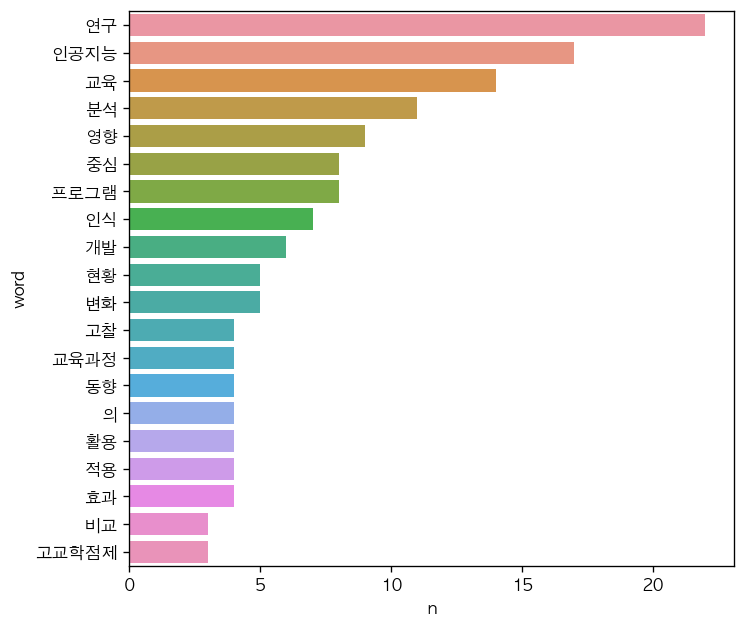

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트의 경우 
# https://github.com/GUuu9/Nas_Docker_jupyter_Ko_fonts
# 해당 페이지을 참고하여 폰트 설정

plt.rcParams.update({'font.family' : 'AppleGothic',
                    'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

sns.barplot(data = top20, y = 'word', x= 'n')

In [18]:
# 워드 클라우드 생성
!pip3 install wordcloud

In [19]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'연구': 22,
 '인공지능': 17,
 '교육': 14,
 '분석': 11,
 '영향': 9,
 '중심': 8,
 '프로그램': 8,
 '인식': 7,
 '개발': 6,
 '현황': 5,
 '변화': 5,
 '고찰': 4,
 '교육과정': 4,
 '동향': 4,
 '의': 4,
 '활용': 4,
 '적용': 4,
 '효과': 4,
 '비교': 3,
 '고교학점제': 3,
 '리더십': 3,
 '세대': 3,
 '이용': 3,
 '도입': 3,
 '과제': 3,
 '경험': 3,
 '초등학교': 3,
 '사례연구': 3,
 '사례': 3,
 '방안': 3,
 '노인': 3,
 '사회적': 3,
 '인공지능교육': 2,
 '탐색': 2,
 '성': 2,
 '특성': 2,
 '인지행동놀이치료': 2,
 '청소년': 2,
 '초등학생': 2,
 '디지털': 2,
 '반영구화장': 2,
 '정책': 2,
 '박물관': 2,
 '전망': 2,
 '분야': 2,
 '비판적': 2,
 '문제점': 2,
 '창의성': 2,
 '메타버스': 2,
 '매개효과': 2,
 '사회': 2,
 '청년': 2,
 '기반': 2,
 '산업': 2,
 '삶': 2,
 '기술': 2,
 '방향': 2,
 '개정': 2,
 '온라인': 2,
 '이론': 2,
 '윤리': 2,
 '관계': 2,
 '관련': 2,
 '시술': 2,
 '시사점': 2,
 '교양교육': 2,
 '요': 2,
 '스마트시티': 2,
 '환자': 2,
 '아동': 2,
 '가치': 2,
 '의미': 2,
 '표현': 2,
 '예술': 2,
 '작품': 1,
 '운영방안': 1,
 '운영': 1,
 '조직사회화': 1,
 '작품제작': 1,
 '우수성': 1,
 '우울': 1,
 '장기': 1,
 '조직몰입': 1,
 '조사': 1,
 '제작': 1,
 '장애': 1,
 '우크라': 1,
 '예술융합교육': 1,
 '정신분석': 1,
 '우리': 1,
 '쟁점': 1,
 '요양보호사의': 1,
 '저출산': 1,
 

In [32]:
from wordcloud import WordCloud
we = WordCloud(random_state = 1234,
              font_path = 'AppleGothic',
              width = 400,
              height = 400,
              background_color = 'white')

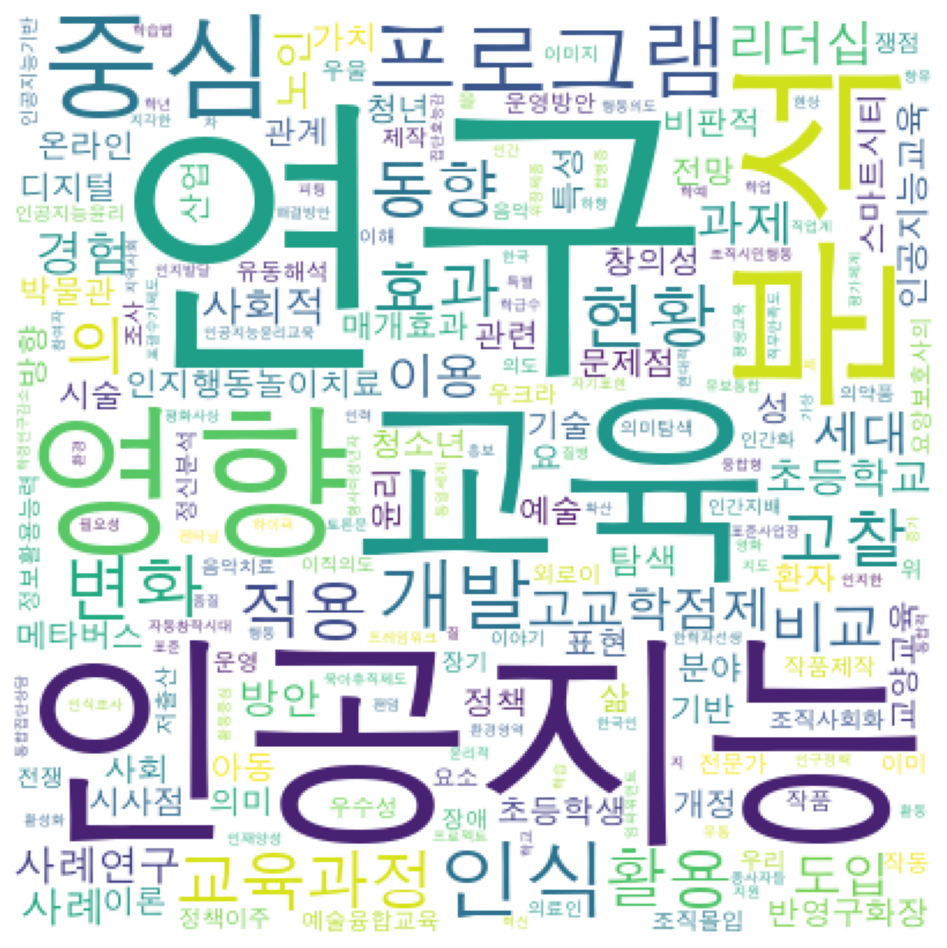

In [35]:
img_wordcloud = we.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)